# basic operations on raster data

based on rasterio
goals of the tutorial

- manage raster data
- manipulate raster and vector data
- bearing

based on the open data of:
- [orthophotos](https://www.comune.trento.it/Aree-tematiche/Cartografia/Download/Ortofoto-2019) of Municipality of Trento 
- DTM - Province of Trento

requirements
- python knowledge
- geopandas

status<br/>
*the world in a matrix*

# Introduction

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/data_models_slide.jpg)

small summary:
view the [slides](https://docs.google.com/presentation/d/e/2PACX-1vT_my7vYOE2_xOdD-eZOtjxEFrbi1BfMcx_84jwomsVgI5wOfPxBO6sPNhxPtaLuEhrrkxmPbiv5Na0/pub?start=false&loop=false&delayms=3000) from the page 11 until 19


![](https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png)


# Setup

In [ ]:
!pip install geopandas

In [ ]:
!pip install rasterio


# Data

Orthophoto of Trento 2019

https://www.comune.trento.it/Aree-tematiche/Cartografia/Download/Ortofoto-2019

- data acquisition: 3th October 2019
- scale 1:2.000
- resolution 1px = 10cm
- [tiff file](https://webapps.comune.trento.it/gis/raster/ortofoto_2019.tif) size 3,5Gb
- crs ETRS89 / UTM zone 32N - EPSG:[25832](https://epsg.io/25832)
- [tfw file](https://webapps.comune.trento.it/gis/raster/ortofoto_2019.tfw)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/orthophoto_trento.png)




... file too big for our purpose

The municipality of Trento [offers](https://www.comune.trento.it/Aree-tematiche/Cartografia/Servizi-WMS-e-WFS) also a WMS service

Please check the lesson "[Retrieving data from spatial database infrastructures](https://napo.github.io/geospatial_course_unitn/lessons/retrieving_data_from_sdi)" 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

The end point of the WMS is http://webapps.comune.trento.it/ogc

---



In [ ]:
!pip install owslib

In [ ]:
from owslib.wms import WebMapService

In [ ]:
wms_trento = "http://webapps.comune.trento.it/ogc"
wms = WebMapService(wms_trento)

In [ ]:
list(wms.contents)

['ogc_services',
 'ortofoto2009',
 'ortofoto2015',
 'ortofoto2016',
 'ortofoto2019',
 'ortofoto2016infrarosso',
 'ortofoto2019infrarosso',
 'ct2000',
 'ct2000_colori',
 'carta_semplificata',
 'ombreDTM',
 'ombreDSM',
 'toponomastica',
 'grafo',
 'civici',
 'civici_principali',
 'toponimi',
 'prg_vigente',
 'adunata_alpini',
 'pric']

In [ ]:
wms['ortofoto2019'].crsOptions

['EPSG:25832', 'EPSG:4326', 'EPSG:3857']

In [ ]:
wms['ortofoto2019'].boundingBox

(648300.0, 5090700.0, 677500.0, 5116000.0, 'EPSG:25832')

In [ ]:
c = wms['ortofoto2019']

In [ ]:
request = wms.getmap(
    layers=['ortofoto2019'],
    srs='EPSG:25832',
    format='image/jpeg',
    bbox=(648300.0, 5090700.0, 677500.0, 5116000.0),
    size=(833,606)
    )

In [ ]:
from rasterio import MemoryFile
from rasterio.plot import show


In [ ]:
image = MemoryFile(request).open()

/usr/local/lib/python3.6/dist-packages/rasterio/io.py:130: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  return DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


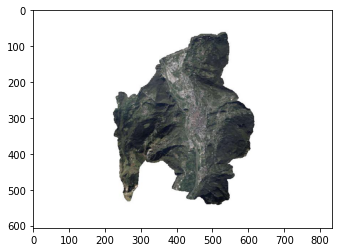

In [ ]:
show(image)

## Manage a raster

Here you can find a cutted version of the geotiff of the muncipality of Trento around the scientific hub area in Povo - Trento

(where the lessons of this course are held)

- [ortophoto](https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo.tif)
- [dtm](https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.tif)

---


In [ ]:
import rasterio

## investigate an orthophoto

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo.tif

--2020-10-29 23:31:10--  https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo.tif
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo.tif [following]
--2020-10-29 23:31:11--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8279208 (7.9M) [application/octet-stream]
Saving to: ‘trento_scientifc_hub_povo.tif.2’

trento_scientifc_hu 100%[===================>]   7.90M  17.5MB/s    in

In [ ]:
file_scientific_hub_povo = "trento_scientifc_hub_povo.tif"

In [ ]:
raster = rasterio.open(file_scientific_hub_povo)

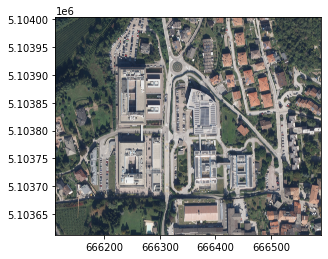

In [ ]:
show(raster)

dimension of the image in pixel

In [ ]:
raster.width

4761

In [ ]:
raster.height

3900

In [ ]:
raster.crs

CRS.from_epsg(25832)

In [ ]:
raster.res

(0.09999999999999999, 0.09999999999999999)

In [ ]:
raster.bounds

BoundingBox(left=666113.0, bottom=5103613.0, right=666589.1, top=5104003.0)

In [ ]:
raster.meta

{'count': 3,
 'crs': CRS.from_epsg(25832),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 3900,
 'nodata': None,
 'transform': Affine(0.09999999999999999, 0.0, 666113.0,
       0.0, -0.09999999999999999, 5104003.0),
 'width': 4761}

In [ ]:
raster.count

3

In [ ]:
raster.indexes # the values start from 1 !

(1, 2, 3)

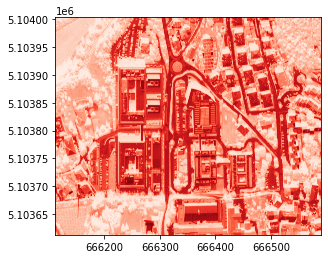

In [ ]:
show((raster, 1), cmap='Reds')

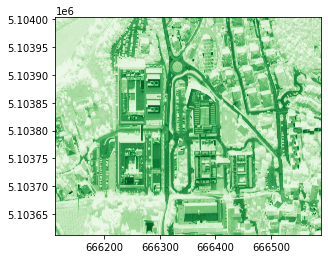

In [ ]:
show((raster, 2), cmap='Greens')

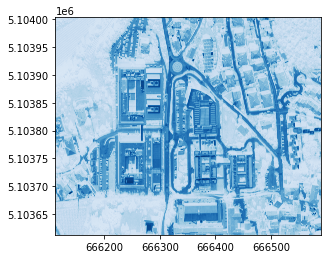

In [ ]:
show((raster, 3), cmap='Blues')

In [ ]:
raster.colorinterp[1]

<ColorInterp.green: 4>

In [ ]:
from rasterio.plot import show_hist

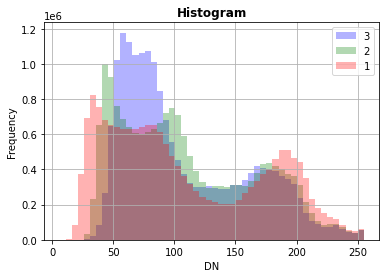

In [ ]:
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

## investigate an DTM file

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.asc

--2020-10-29 23:32:34--  https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.asc
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo_dtm.asc [following]
--2020-10-29 23:32:35--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo_dtm.asc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 820541 (801K) [text/plain]
Saving to: ‘trento_scientifc_hub_povo_dtm.asc.2’

trento_scientifc_hu 100%[===================>] 801.31K  --.-KB/s    i

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.prj

--2020-10-29 23:32:36--  https://github.com/napo/geospatial_course_unitn/raw/master/data/raster/trento_scientifc_hub_povo_dtm.prj
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo_dtm.prj [following]
--2020-10-29 23:32:36--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/raster/trento_scientifc_hub_povo_dtm.prj
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403 [text/plain]
Saving to: ‘trento_scientifc_hub_povo_dtm.prj.2’

trento_scientifc_hu 100%[===================>]     403  --.-KB/s    in 0s      

In [ ]:
dtm = "trento_scientifc_hub_povo_dtm.asc"

In [ ]:
raster_dtm = rasterio.open(dtm)

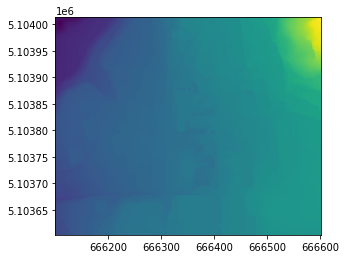

In [ ]:
show(raster_dtm)

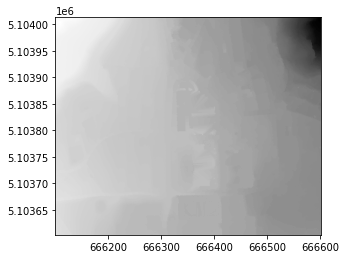

In [ ]:
show(raster_dtm,cmap="Greys")

In [ ]:
raster_dtm.crs

CRS.from_wkt('PROJCS["ETRS_1989_UTM_Zone_32N",GEOGCS["GCS_ETRS_1989",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]')

In [ ]:
raster_dtm.meta

{'count': 1,
 'crs': CRS.from_wkt('PROJCS["ETRS_1989_UTM_Zone_32N",GEOGCS["GCS_ETRS_1989",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'),
 'driver': 'AAIGrid',
 'dtype': 'float32',
 'height': 410,
 'nodata': None,
 'transform': Affine(1.0, 0.0, 666100.6735466761,
       0.0, -1.0, 5104013.23583161),
 'width': 500}

In [ ]:
raster_dtm.res

(1.0, 1.0)

In [ ]:
raster_dtm.count

1

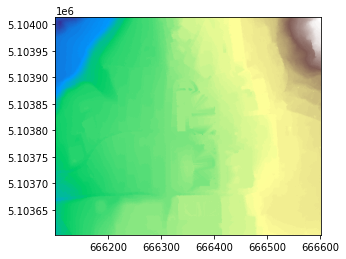

In [ ]:
show(raster_dtm, cmap='terrain')

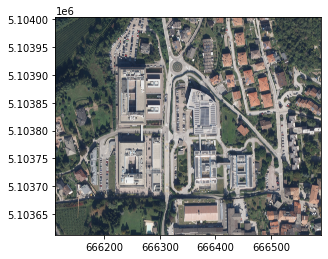

In [ ]:
show(raster)

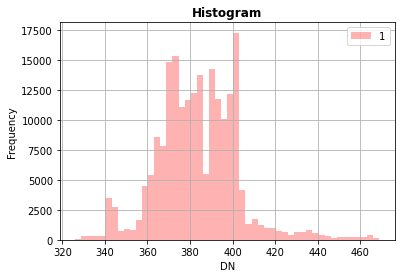

In [ ]:
show_hist(raster_dtm, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

In [ ]:
data = raster_dtm.read(1)

In [ ]:
type(data)

numpy.ndarray

Which altitude is?

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/trento_scientific_hub_3d.jpg)



In [ ]:
data.mean()

383.85464

In [ ]:
data.min()

326.0

In [ ]:
data.max()

469.0

find the value on a given point

Example:<br/>
the position of "Via Sommarive 18, Trento" (the address of FBK)

In [ ]:
import shapely
import pyproj
from geopy.geocoders import Nominatim
from shapely.ops import transform

... identify the point wiht a geocoder

In [ ]:
geolocator = Nominatim(user_agent="geospatial course")
location = geolocator.geocode("Via Sommarive 18, Trento")

In [ ]:
x = location.longitude
y = location.latitude

transform the coordinate from EPSG 4326 to 25832

In [ ]:
wgs84 = pyproj.CRS('EPSG:4326')
crs_dtm = pyproj.CRS('EPSG:25832')
projection_transform = pyproj.Transformer.from_crs(wgs84, crs_dtm, always_xy=False).transform

In [ ]:
point_location = shapely.geometry.Point(y,x)

In [ ]:
point_location_crs_dtm = transform(projection_transform,point_location)

In [ ]:
x = point_location_crs_dtm.x
y = point_location_crs_dtm.y

In [ ]:
row,col = rasterio.transform.rowcol(raster_dtm.transform,(x),(y))

Identify the value

In [ ]:
data[row][col]

381.0

## Resampling

Downsampling to 1/5 of the resolution can be done withupscale_factor = 1/6

In [ ]:
import rasterio
from rasterio.enums import Resampling

upscale_factor = 1/5

# resample data to target shape
data_s = raster_dtm.read(
        out_shape=(
            raster_dtm.count,
            int(raster_dtm.width * upscale_factor),
            int(raster_dtm.height * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
profile =raster_dtm.profile
profile.update(dtype=rasterio.uint8, count=1, compress='lzw')

with rasterio.open('resampled_area.tif', 'w', **profile) as dst:
  dst.write(data_s.astype(rasterio.uint8))

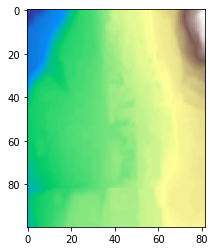

In [ ]:
show(data_s, cmap='terrain')

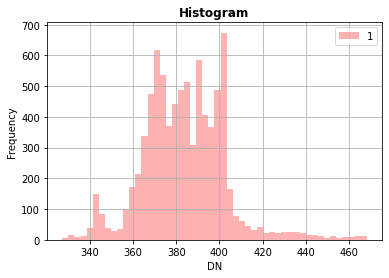

In [ ]:
show_hist(data_s, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

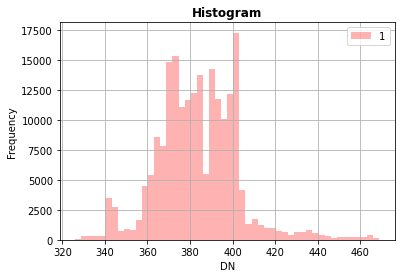

In [ ]:
show_hist(raster_dtm, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

# Masking / clipping raster

One common task in raster processing is to clip raster files based on a Polygon

We start to extract the polygon of the area held by Bruno Kessler Foundation (research center in front of the university)



![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/fbk_overpassturbo.png)

http://overpass-turbo.eu/s/Zw8

geojson exported:

https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/boundary_fbk_povo.geojson


In [ ]:
import geopandas as gpd

In [ ]:
fbk = gpd.read_file("https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/boundary_fbk_povo.geojson")

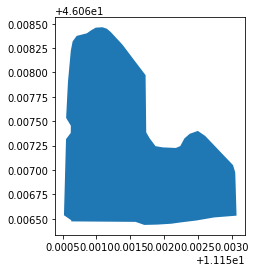

In [ ]:
fbk.plot()

In [ ]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [ ]:
coords = getFeatures(fbk.to_crs(epsg=25832))

In [ ]:
coords

[{'coordinates': [[[666327.6121890642, 5103893.127195438],
    [666323.144271185, 5103886.635365136],
    [666321.3931118533, 5103876.125343578],
    [666319.0792195683, 5103840.3496225],
    [666318.08261142, 5103799.36152162],
    [666323.7228536663, 5103790.552413938],
    [666323.834530518, 5103782.416574045],
    [666318.6225224709, 5103775.104085964],
    [666318.6091393529, 5103688.31146606],
    [666327.0838932644, 5103682.87013375],
    [666327.1737856156, 5103681.549444295],
    [666400.6669444224, 5103682.9926035525],
    [666410.7295525032, 5103679.7958390545],
    [666425.7927338771, 5103680.570343598],
    [666441.5815165223, 5103681.987167167],
    [666451.6897212835, 5103683.683917669],
    [666470.004685441, 5103686.414475457],
    [666490.3886287892, 5103690.4797439],
    [666515.9557992362, 5103693.195510002],
    [666513.463898501, 5103736.924514817],
    [666513.0686339957, 5103742.662169834],
    [666510.3745651151, 5103750.694746069],
    [666494.0244603785, 5103

In [ ]:
from rasterio.mask import mask

In [ ]:
out_img, out_transform = mask(raster, coords, crop=True)

In [ ]:
out_meta = raster.meta

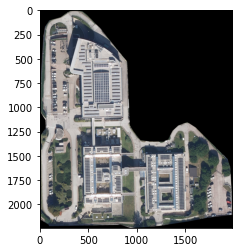

In [ ]:
show(out_img)

In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})

with rasterio.open("fbk_orthophoto.tif", "w", **out_meta) as dest:
    dest.write(out_img)


## raster to vector

In [ ]:
fbk_orthophoto = rasterio.open('resampled_area.tif')

In [ ]:
from rasterio.features import shapes
mask = None
image = fbk_orthophoto.read(1) # first band
results = (
  {'properties': {'raster_val': v}, 'geometry': s}
  for i, (s, v) 
    in enumerate(
      shapes(image, mask=mask, transform=raster.transform)))

In [ ]:
geoms = list(results)
%time

In [ ]:
gpd_polygonized_raster  = gpd.GeoDataFrame.from_features(geoms)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [ ]:
gpd_polygonized_raster.shape

In [ ]:
gpd_polygonized_raster.geometry.area.max()

# Exercises

- clip the area with the shape of Polo Ferrari (in front on FBK)
- create the altitude profile of the street "Via Sommarive"
- find the area FBK in the WMS of municipality of Trento - layer "Carta Tecnica 1:2.000 alta risoluzione" and vectorize it
